In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
import numpy as np
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.utilities import Pareto_split

In [2]:
seed = 1
INVERT = True
uncertainty= 0.1

In [3]:
def image_infill(opt, front_value = 0., n_contours=20):
    #figure_properties
    fig = plt.figure(figsize=[9,7])
    ax = fig.gca()
    ax.set_xlim([0,1.5])
    ax.set_ylim([0,1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0, 1.5, M)
    y = np.linspace(0, 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty, invert=INVERT) for xyi in xy])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(front_legend)
    labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

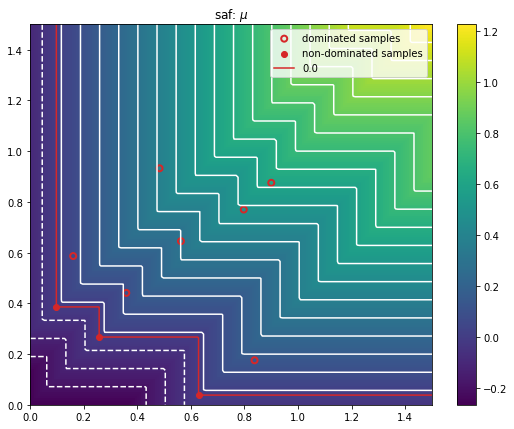

In [4]:
from testsuite.optimisers import Saf

saf_opt = Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_saf = image_infill(saf_opt)
fig_saf.axes[0].set_title("saf: $\mu$");

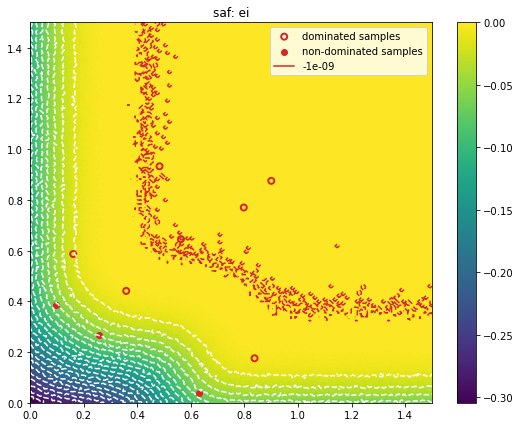

In [12]:
from testsuite.optimisers import Saf

safei_opt = Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
front_v = -1e-9 if INVERT else 1e-8
fig_safei = image_infill(safei_opt, front_value=front_v)
fig_safei.axes[0].set_title("saf: ei");

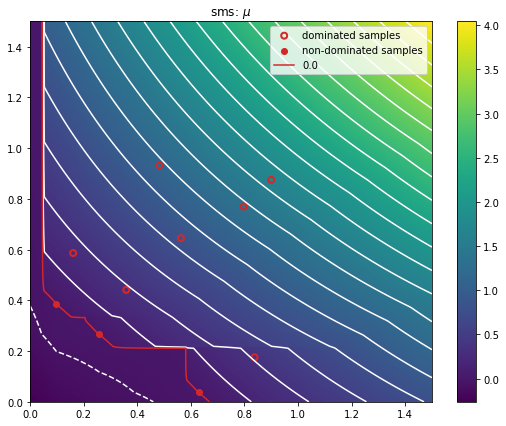

In [6]:
from testsuite.optimisers import SmsEgo

smsego_opt = SmsEgo(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smsego = image_infill(smsego_opt)
fig_smsego.axes[0].set_title("sms: $\mu$");

Text(0.5, 1.0, 'sms: ei')

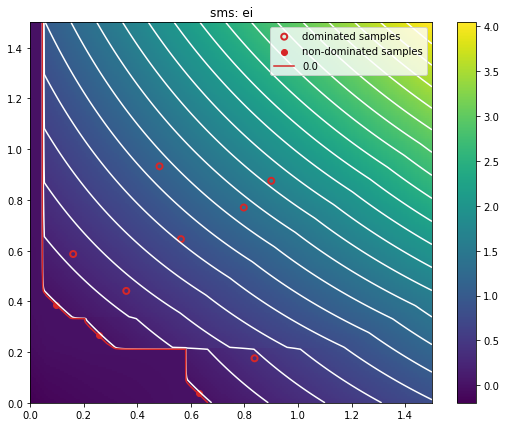

In [7]:
smsego_ei_opt = SmsEgo(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smsego_ei = image_infill(smsego_ei_opt)
fig_smsego_ei.axes[0].set_title("sms: ei") 

Text(0.5, 1.0, 'Mpoi')

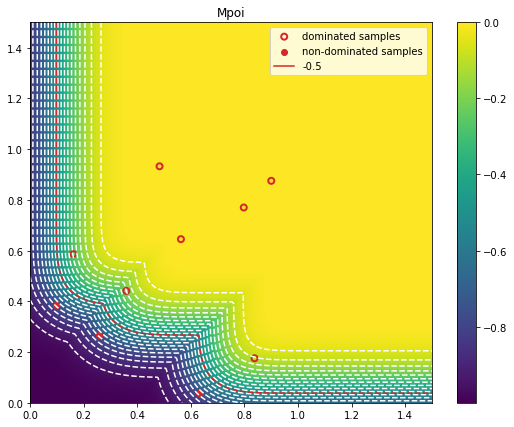

In [8]:
from testsuite.optimisers import Mpoi 

mpoi_opt = Mpoi(objective_function=lambda x: x[0:2],  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
front_v = -0.5 if INVERT else 0.5
fig_mpoi = image_infill(mpoi_opt, front_value=front_v)
fig_mpoi.axes[0].set_title("Mpoi") 

Text(0.5, 1.0, 'sms-ego | saf')

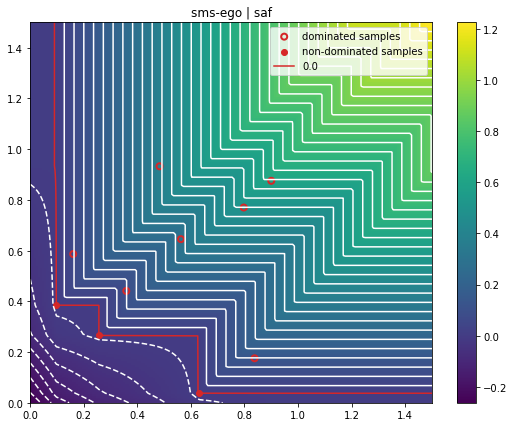

In [14]:
from testsuite.optimisers import Saf_Sms

safsms_opt = Saf_Sms(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_safsms = image_infill(safsms_opt, n_contours=40)
fig_safsms.axes[0].set_title("sms-ego | saf") 

Text(0.5, 1.0, 'saf | sms-ego')

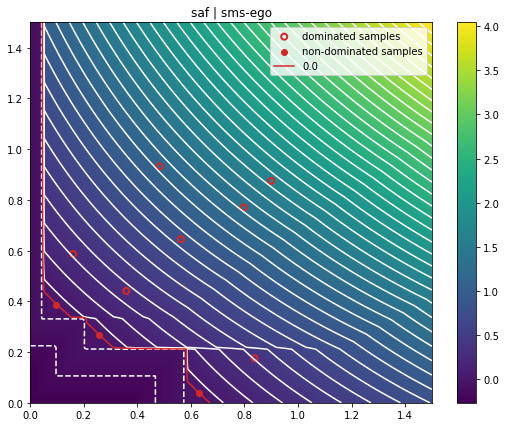

In [15]:
from testsuite.optimisers import Sms_Saf

smssaf_opt = Sms_Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smssaf = image_infill(smssaf_opt, n_contours=40)
fig_smssaf.axes[0].set_title("saf | sms-ego") 

Text(0.5, 1.0, 'saf ei| saf $\\mu$')

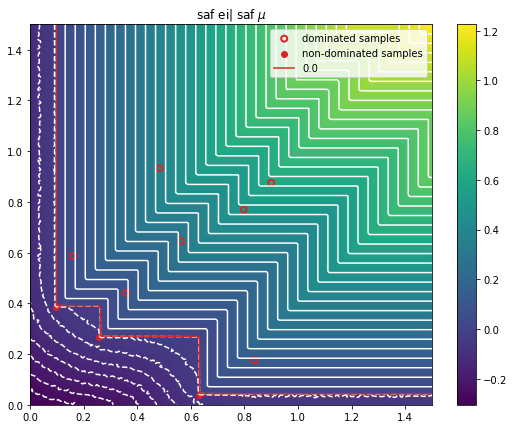

In [11]:
from testsuite.optimisers import Saf_Saf

safsaf_opt = Saf_Saf(objective_function=lambda x: x[0:2], ei=True,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_safsaf = image_infill(safsaf_opt, n_contours=40)
fig_safsaf.axes[0].set_title("saf ei | saf $\mu$")